In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import pymc3 as pm

%matplotlib inline

In [51]:
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 10, 1
beta = 1

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)


# Simulate outcome variable
Y = alpha + beta*X1 + np.random.randn(size)*sigma

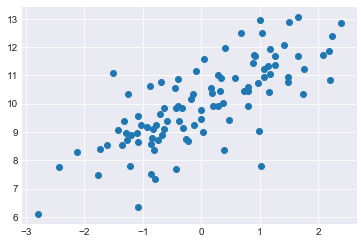

In [52]:
plt.scatter(X1,Y)


In [53]:
regression_model = pm.Model()

with regression_model:

    
    alpha = pm.Normal('alpha', mu=100, sd=10)
    beta = pm.Normal('beta', mu=100, sd=5)
    sigma = pm.HalfNormal('sigma', sd=1)

    
    mu = alpha + beta*X1 

    
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [54]:
map_estimate = pm.find_MAP(model=regression_model)

map_estimate

logp = -381.82, ||grad|| = 1.4023e-05: 100%|███████████████████████████████████████████| 52/52 [00:00<00:00, 94.79it/s]


{'alpha': array(9.98853103),
 'beta': array(1.01225237),
 'sigma_log__': array(-0.03463388),
 'sigma': array(0.96595901)}

In [56]:
# Inference button (TM)!
with regression_model:
    regression_model = pm.sample(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 3000/3000 [03:05<00:00, 16.20draws/s]
The acceptance probability does not match the target. It is 0.9644121876463563, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9040734964283242, but should be close to 0.8. Try to increase the number of tuning steps.


In [58]:
pm.summary(regression_model)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,9.989145,0.098021,0.002495,9.809040,10.198693,1594.055307,1.001822
beta,1.012405,0.086883,0.002031,0.837594,1.173208,1862.871257,0.999690
sigma,0.991383,0.073564,0.001588,0.854506,1.139846,2117.614119,0.999924


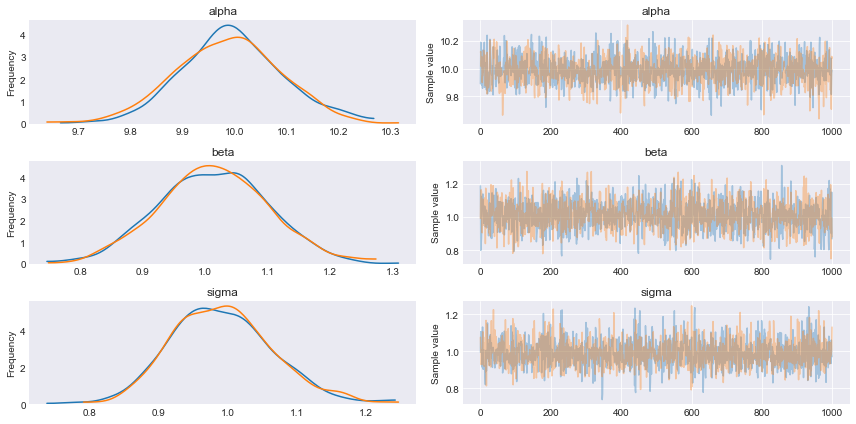

In [59]:
_ = pm.traceplot(regression_model)